In [1]:
from dotblotr.analysis import calc_hit_counts
from dotblotr.image import quantify_blot_array
from dotblotr.viz import plot_value, plot_hit_counts
import pandas as pd

In [2]:
im_paths = [
    '/Users/kevin.yamauchi/Documents/ULTRA6 run individuals/2-D149.tif',
    '/Users/kevin.yamauchi/Documents/ULTRA6 run individuals/3-D152.tif',
    '/Users/kevin.yamauchi/Documents/ULTRA6 run individuals/4-D153.tif',
    '/Users/kevin.yamauchi/Documents/ULTRA6 run individuals/5-D154.tif',
    '/Users/kevin.yamauchi/Documents/ULTRA6 run individuals/6-D162.tif',
]

blot_config_path = '../configs/384_tiny_config.json'
assay_config_path = '../configs/assay_config_anti-yo1.csv'

assay_results = []

# Run through each blot
for im_path in im_paths:
    strip_id = im_path.split('/')[-1].split('.')[0]
    result = quantify_blot_array(
        im_path=im_path,
        strip_id=strip_id,
        array_config_path=blot_config_path,
        assay_config_path=assay_config_path
    )
    
    assay_results.append(result)

results_table = pd.concat(assay_results, axis=0, ignore_index=True)

In [3]:
results_table

,assay_id,strip_id,blot_label,source_plate_id,source_plate_row,source_plate_column,exp_group,thresh_factor,blob_label,row,col,x,y,mean_intensity_control,area,mean_intensity_probe,norm_probe_intensity,pos_thresh,pos_hit
0,assay_config_anti-yo1.csv,2-D149,A1,Anti-Yo_1,A,1,neg,3,12.0,0.0,0.0,126.676568,161.155116,92.891089,303.0,62.082508,0.668337,0.933781,False
1,assay_config_anti-yo1.csv,2-D149,A2,Anti-Yo_1,A,2,neg,3,13.0,0.0,1.0,200.896552,160.773946,87.804598,261.0,61.429119,0.699612,0.933781,False
2,assay_config_anti-yo1.csv,2-D149,A3,Anti-Yo_1,A,3,neg,3,21.0,0.0,2.0,277.382022,166.370787,83.820225,267.0,60.254682,0.718856,0.933781,False
3,assay_config_anti-yo1.csv,2-D149,A4,Anti-Yo_1,A,4,exp,3,2.0,0.0,3.0,346.685969,158.305122,122.008909,449.0,71.394209,0.585156,0.933781,False
4,assay_config_anti-yo1.csv,2-D149,A5,Anti-Yo_1,A,5,neg,3,22.0,0.0,4.0,431.397380,166.183406,79.305677,229.0,56.842795,0.716756,0.933781,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1904,assay_config_anti-yo1.csv,6-D162,P20,Anti-Yo_1,P,20,exp,3,376.0,15.0,19.0,1526.907738,1269.184524,191.520833,336.0,185.232143,0.967164,0.275515,True
1905,assay_config_anti-yo1.csv,6-D162,P21,Anti-Yo_1,P,21,exp,3,378.0,15.0,20.0,1587.375000,1271.340116,191.904070,344.0,77.171512,0.402136,0.275515,True
1906,assay_config_anti-yo1.csv,6-D162,P22,Anti-Yo_1,P,22,exp,3,380.0,15.0,21.0,1654.889937,1272.270440,184.267296,318.0,255.000000,1.383859,0.275515,True
1907,assay_config_anti-yo1.csv,6-D162,P23,Anti-Yo_1,P,23,exp,3,381.0,15.0,22.0,1724.734807,1271.939227,194.527624,362.0,45.361878,0.233190,0.275515,False


In [4]:
strip_ids = [im_path.split('/')[-1].split('.')[0] for im_path in im_paths]

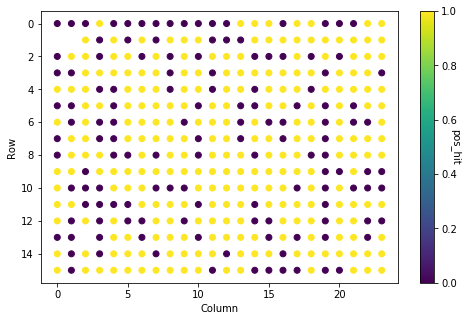

In [5]:
plot_value(results_table.loc[results_table['strip_id'] == strip_ids[2]], 'pos_hit');

In [6]:
for sid in strip_ids:
    print(len(results_table.loc[results_table['strip_id'] == sid]))

382
382
381
382
382


In [7]:
results_table.loc[results_table.pos_hit]

,assay_id,strip_id,blot_label,source_plate_id,source_plate_row,source_plate_column,exp_group,thresh_factor,blob_label,row,col,x,y,mean_intensity_control,area,mean_intensity_probe,norm_probe_intensity,pos_thresh,pos_hit
65,assay_config_anti-yo1.csv,2-D149,C20,Anti-Yo_1,C,20,exp,3,48.0,2.0,19.0,1564.478424,304.782364,138.135084,533.0,170.454034,1.233966,0.933781,True
100,assay_config_anti-yo1.csv,2-D149,E7,Anti-Yo_1,E,7,exp,3,100.0,4.0,6.0,579.457213,458.951100,96.239609,409.0,101.400978,1.053630,0.933781,True
120,assay_config_anti-yo1.csv,2-D149,F3,Anti-Yo_1,F,3,exp,3,131.0,5.0,2.0,274.911927,535.546789,139.539450,545.0,255.000000,1.827440,0.933781,True
156,assay_config_anti-yo1.csv,2-D149,G15,Anti-Yo_1,G,15,exp,3,157.0,6.0,14.0,1181.971717,609.917172,127.715152,495.0,149.527273,1.170787,0.933781,True
162,assay_config_anti-yo1.csv,2-D149,G21,Anti-Yo_1,G,21,exp,3,143.0,6.0,20.0,1638.470588,599.284314,114.958333,408.0,107.933824,0.938895,0.933781,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1902,assay_config_anti-yo1.csv,6-D162,P18,Anti-Yo_1,P,18,exp,3,377.0,15.0,17.0,1389.517857,1271.083333,185.020833,336.0,104.244048,0.563418,0.275515,True
1904,assay_config_anti-yo1.csv,6-D162,P20,Anti-Yo_1,P,20,exp,3,376.0,15.0,19.0,1526.907738,1269.184524,191.520833,336.0,185.232143,0.967164,0.275515,True
1905,assay_config_anti-yo1.csv,6-D162,P21,Anti-Yo_1,P,21,exp,3,378.0,15.0,20.0,1587.375000,1271.340116,191.904070,344.0,77.171512,0.402136,0.275515,True
1906,assay_config_anti-yo1.csv,6-D162,P22,Anti-Yo_1,P,22,exp,3,380.0,15.0,21.0,1654.889937,1272.270440,184.267296,318.0,255.000000,1.383859,0.275515,True


In [8]:
pos_hit_dfs = calc_hit_counts(results_table)

In [10]:
pos_hit_dfs[0]

,blot_label,assay_id,source_plate_id,source_plate_row,source_plate_column,exp_group,row,col,n_hits
65,C20,assay_config_anti-yo1.csv,Anti-Yo_1,C,20,exp,2.0,19.0,5
100,E7,assay_config_anti-yo1.csv,Anti-Yo_1,E,7,exp,4.0,6.0,4
120,F3,assay_config_anti-yo1.csv,Anti-Yo_1,F,3,exp,5.0,2.0,5
156,G15,assay_config_anti-yo1.csv,Anti-Yo_1,G,15,exp,6.0,14.0,5
162,G21,assay_config_anti-yo1.csv,Anti-Yo_1,G,21,exp,6.0,20.0,5
...,...,...,...,...,...,...,...,...,...
1900,P16,assay_config_anti-yo1.csv,Anti-Yo_1,P,16,exp,15.0,15.0,1
1901,P17,assay_config_anti-yo1.csv,Anti-Yo_1,P,17,exp,15.0,16.0,1
1902,P18,assay_config_anti-yo1.csv,Anti-Yo_1,P,18,exp,15.0,17.0,1
1904,P20,assay_config_anti-yo1.csv,Anti-Yo_1,P,20,exp,15.0,19.0,1


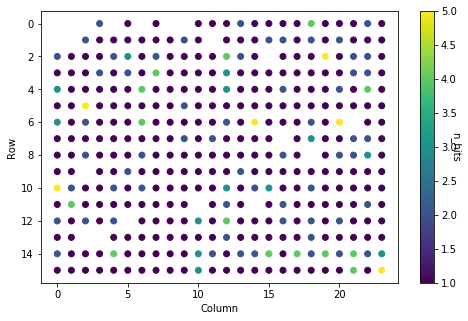

In [11]:
# plot the hit counts on the array.
# spots with no dot had 0 hits
plot_hit_counts(pos_hit_dfs[0]);